## 가위바위보 분류기 만들기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


웹캠을 사용하여 데이터를 준비해봅시다!  

1) 데이터 만들기
노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지를 각각 100장을 만들어봅시다.  

- https://teachablemachine.withgoogle.com/

2) 가위 이미지 데이터 만들기

웹캠 앞에서 포즈를 가위 포즈를 취한 후, <Hold to Record>버튼을 누르면 이미지가 캡쳐됩니다. 
- 여러 각도에서 찍기
- 여러 크기로 찍기
- 배경이 깔끔할 수록 좋음 (단색배경)

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-9.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-10.max-800x600.png)

3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-1-11.png)

4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해봅시다.
바위와 보 이미지들에 대해서도 위 과정을 진행해주세요!  
(각각, "rock.zip", "paper.zip", 이름을 저장해주세요!)

- 이미지 예시  
`ock_scissor_paper/paper` 폴더 내 이미지들은 아래와 같이 저장이 되어 있을 것입니다.



![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-12.max-800x600.png)

5) 데이터불러오기 + Resize하기  

숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해봅시다

In [ ]:
## 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [106]:
## 학습데이터.zip 업로드
from google.colab import files
file_uploaded = files.upload()

In [108]:
path = '/content/drive/MyDrive/dataset'
folder_path = list(glob.iglob(path+'/*'))

In [109]:
number_of_data=300
img_size=28
color=3
x_train = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
y_train = np.zeros(number_of_data,dtype=np.int32)
for f_path in folder_path:
  try:
    x_temp, y_temp = load_data(f_path) 
    x_train = np.concatenate((x_train, x_temp), axis=0)
    y_train = np.concatenate((y_train, y_temp), axis=0)
  except: pass


학습데이터(x_train)의 이미지 개수는 0 입니다.
학습데이터(x_train)의 이미지 개수는 0 입니다.


In [ ]:
#!unzip  "rock_scissors_papper.zip" -d"./rock_scissor_paper" # 안에 있는 폴더 나옴
#!unzip "scissors.zip" -d "./scissors"
#!unzip "paper.zip" -d "./paper"
#!unzip "rock.zip" -d "./rock"

In [43]:
img_path = '/content/drive/MyDrive/multiclass/dataset/rock_scissors_papper'

In [44]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [90]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/multiclass/rock_scissors_papper/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!


In [89]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/multiclass/rock_scissors_papper/rock"
resize_images(image_dir_path)
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
print("바위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
바위 이미지 resize 완료!


In [91]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/multiclass/rock_scissors_papper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

500  images to be resized.
500  images resized.
보 이미지 resize 완료!


In [61]:
img_path = '/content/drive/MyDrive/multiclass/rock_scissors_papper'

In [110]:
import numpy as np

def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/multiclass/rock_scissors_papper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1500 입니다.
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


라벨:  0


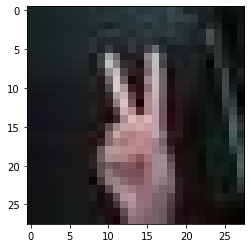

In [94]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [95]:
from threading import active_count
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), padding = 'same', activation='relu', input_shape = (28,28,3))) # 깊이,(필터사이즈), padding, activation, input_shape
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax')) # 가위/바위/보
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [113]:
# VGG16 모델 만들기

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), padding = 'same', activation='relu', input_shape = (28,28,3)))
model.add(keras.layers.Conv2D(16,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(256,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(256,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.Conv2D(256,(3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(1,1))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax')) # 가위/바위/보
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                 

## 딥러닝 네트워크 학습시키기

In [114]:
print('Before reshape - x_train_norm shape : {}'.format(x_train_norm.shape))
x_train_reshape = x_train_norm.reshape(-1,28,28,3)
print('After Reshape - x_train_reshape shape : {}'.format(x_train_reshape.shape))

Before reshape - x_train_norm shape : (1500, 28, 28, 3)
After Reshape - x_train_reshape shape : (1500, 28, 28, 3)


In [115]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train_reshape, y_train, epochs = 20)

Epoch 1/20
47/47 [==============================] - 11s 223ms/step - loss: 1.0992 - accuracy: 0.3213
Epoch 2/20
47/47 [==============================] - 11s 224ms/step - loss: 1.0987 - accuracy: 0.3287
Epoch 3/20
47/47 [==============================] - 10s 223ms/step - loss: 1.0987 - accuracy: 0.3293
Epoch 4/20
47/47 [==============================] - 10s 222ms/step - loss: 1.0988 - accuracy: 0.3107
Epoch 5/20
47/47 [==============================] - 11s 231ms/step - loss: 1.0987 - accuracy: 0.3193
Epoch 6/20
47/47 [==============================] - 10s 223ms/step - loss: 1.0987 - accuracy: 0.3300
Epoch 7/20
47/47 [==============================] - 11s 224ms/step - loss: 1.0987 - accuracy: 0.3107
Epoch 8/20
47/47 [==============================] - 11s 223ms/step - loss: 1.0987 - accuracy: 0.3287
Epoch 9/20
47/47 [==============================] - 11s 225ms/step - loss: 1.0988 - accuracy: 0.3267
Epoch 10/20
47/47 [==============================] - 10s 223ms/step - loss: 1.0987 - accura

## 테스트하기

In [73]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scissor_paper/rock_scissors_papper/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [71]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scissor_paper/rock_scissors_papper/rock"
resize_images(image_dir_path)
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [72]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scissor_paper/rock_scissors_papper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [117]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
#image_dir_path = '/content/drive/MyDrive/multiclass/rock_scissors_papper_namgungjunghu'
image_dir_path_test = '/content/rock_scissor_paper/rock_scissors_papper'
(x_test, y_test) = load_data(image_dir_path_test)
x_test_norm = x_test/255.0

print('x_test : {}'.format(x_test.shape))
print('y_test : {}'.format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test : (1500, 28, 28, 3)
y_test : (1500,)


In [118]:
!unzip  "/content/drive/MyDrive/multiclass/rock_scissor_paper.zip" #-d"./rock" # 안에 있는 폴더 나옴
#!unzip  "/content/drive/MyDrive/multiclass/rock_scissor_paper.zip" #-d"./scissors" # 안에 있는 폴더 나옴
#!unzip  "/content/drive/MyDrive/multiclass/rock_scissor_paper.zip" #-d"./papper" # 안에 있는 폴더 나옴

Archive:  /content/drive/MyDrive/multiclass/rock_scissor_paper.zip
replace paper/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [119]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

47/47 - 1s - loss: 1.1001 - accuracy: 0.0667 - 1s/epoch - 26ms/step
test_loss : 1.100084662437439
test_accuracy : 0.06666667014360428


## 더 좋은 네트워크 만들기